# Functions to export

In [97]:
def column_distplot(dataframe, column, xlabel=None): 
    '''Plot the histogram of a column using Seaborn'''
    # Set Figure
    sns.set(rc={'figure.figsize':(10,5)},style="white", context="talk")

    # Plot
    column = column
    data = dataframe[column][~dataframe[column].isna()]
    ax = sns.distplot(data);

    # Title and Axis
    ax.set_title("Histogram of the fighters' {}".format(column));
    if type(xlabel)==str:
        ax.set_xlabel(xlabel)
    else:
        ax.set_xlabel(str(column).capitalize())
    sns.despine()
    
    col_cap = str(column).capitalize()
    print("{} Skewness: {}".format(col_cap, round(dataframe[column].skew(), 2)))
    print("{} Kurtosis: {}".format(col_cap, round(dataframe[column].kurt(), 2)))
    
    print('{} Mean: {}'.format(col_cap, round(data.mean(), 2)))
    print('{} Median: {}'.format(col_cap, data.median()))

In [98]:
def column_countplot(dataframe, column, show_count=False):
    '''Plot the count of each category for a column in the dataframe'''
    
    # Set the figure
    sns.set(rc={'figure.figsize':(10,5)},style="white", context="talk")
    
    # Plot
    ax = sns.countplot(x=column, data=dataframe, color="b")
  
    # Title and Axis
    ax.set_title("Counts of each {} category".format(column))
    ax.set_xlabel(str(column).capitalize())
    ax.set_ylabel('Count')
    sns.despine()
    
    if show_count:
        for p in ax.patches:
            ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))

In [99]:
def parse_height(height):
    '''Splits the height value into feet and inches'''
    ht_ = height.split(" ")
    ft_ = float(ht_[0])
    in_ = float(ht_[1])
    return (12*ft_) + in_

# EDA & Data Cleaning - [Your Project Name Here]

## Local Code Imports - Do not delete

In [100]:
# DO NOT REMOVE THESE
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
# DO NOT REMOVE This
%reload_ext autoreload

In [102]:
## DO NOT REMOVE
## import local src module -
## src in this project will contain all your local code
## clean_data.py, model.py, visualize.py, custom.py
from src import make_data as mk
from src import visualize as viz
from src import model as mdl
from src import pandas_operators as po

def test_src():
    mk.test_make_data()
    viz.test_viz()
    mdl.test_model()
    po.test_pandas()
    
    return 1

In [103]:
test_src()

In make_data
In Visualize
In Model
In pandas ops


1

## Code Imports

In [104]:
# Dataframes
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Calculating age of fighters
import datetime

In [105]:
datetime.date.today()

datetime.date(2019, 7, 21)

# Project Overview


## Background

UFC BACKGROUND

PROJECT OBJECTIVE

# Data Understanding

## Bouts Data

### Bouts Data  - Description

RESERVED FOR BOUTS DATA DESCRIPTION

#### Bouts Data - Data Dictionary

RESERVED SPACE FOR BOUTS DATA DICTIONARY

### Bouts Data - Import and Summary

In [106]:
data_bouts = pd.read_csv('../data/raw/ufc_bouts.csv', parse_dates=['date'])
data_bouts.head(3)

,bout_id,event_name,date,location,attendance,result,fighter1,fighter2,winner,weight_class,title_fight,method,end_round,end_time
0,1,UFC Fight Night: Magny vs. Ponzinibbio,2018-11-17,"Buenos Aires, Buenos Aires, Argentina",10245.0,win,Santiago Ponzinibbio,Neil Magny,Santiago Ponzinibbio,Welterweight,f,KO/TKO-Punch,4,2:36
1,2,UFC Fight Night: Magny vs. Ponzinibbio,2018-11-17,"Buenos Aires, Buenos Aires, Argentina",10245.0,win,Ricardo Lamas,Darren Elkins,Ricardo Lamas,Featherweight,f,KO/TKO-Elbows,3,4:09
2,3,UFC Fight Night: Magny vs. Ponzinibbio,2018-11-17,"Buenos Aires, Buenos Aires, Argentina",10245.0,win,Johnny Walker,Khalil Rountree Jr.,Johnny Walker,Light Heavyweight,f,KO/TKO-Elbow,1,1:57


In [107]:
print('DataFrame Shape is {}'.format(data_bouts.shape))
print('This represents {} fights'.format(data_bouts.shape[0]))

DataFrame Shape is (4878, 14)
This represents 4878 fights


In [108]:
data_bouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4878 entries, 0 to 4877
Data columns (total 14 columns):
bout_id         4878 non-null int64
event_name      4878 non-null object
date            4878 non-null datetime64[ns]
location        4878 non-null object
attendance      4682 non-null float64
result          4878 non-null object
fighter1        4878 non-null object
fighter2        4878 non-null object
winner          4796 non-null object
weight_class    4878 non-null object
title_fight     4878 non-null object
method          4878 non-null object
end_round       4878 non-null int64
end_time        4878 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(10)
memory usage: 533.6+ KB


### Bouts Data -  Exploration & Cleaning

In [109]:
if data_bouts.shape[0] == data_bouts['bout_id'].nunique():
    print('Each sample (row) in our bouts data is unique')

Each sample (row) in our bouts data is unique


#### Results column - drop nc and draw rows

In [110]:
data_bouts.result.value_counts()

win     4796
nc        48
draw      34
Name: result, dtype: int64

- The no contests are either due to illegal moves or failed drugs tests.  
- Example below between Nick Diaz and Anderson Silva was a no contest due to Anderson Silva failing a drugs test
- https://www.mmamania.com/2015/2/6/7992549/no-contest-anderson-silvas-victory-over-nick-diaz-at-ufc-183

In [111]:
# Example of no contest between Nick Diaz and Anderson Silva
data_bouts[(data_bouts['result']=='nc') & (data_bouts['fighter1']=='Anderson Silva')]

,bout_id,event_name,date,location,attendance,result,fighter1,fighter2,winner,weight_class,title_fight,method,end_round,end_time
3300,3301,UFC 183: Silva vs Diaz,2015-01-31,"Las Vegas, Nevada, USA",13114.0,nc,Anderson Silva,Nick Diaz,NaN,Middleweight,f,Overturned,5,5:00


In [112]:
print('Result Column Value Counts:\n', data_bouts.result.value_counts(), '\n')

# Drop NC rows as they dont help us predict the outcome
data_bouts = data_bouts[data_bouts['result']!='nc']

# drop the draw rows for now, so that we have a binary outcome of win or lose
data_bouts = data_bouts[data_bouts['result']!='draw']

print('Result Column Value Counts After Dropping nc AND draw:\n', data_bouts.result.value_counts())

Result Column Value Counts:
 win     4796
nc        48
draw      34
Name: result, dtype: int64 

Result Column Value Counts After Dropping nc AND draw:
 win    4796
Name: result, dtype: int64


#### Location column - shorten

In [113]:
# Strip the location column down to only the country
data_bouts['location'] = data_bouts['location'].str.split(" ").str.get(-1)
# Rename the location column to bout_location
data_bouts.rename({'location': 'bout_location'}, inplace=True)

data_bouts.head(2)

,bout_id,event_name,date,location,attendance,result,fighter1,fighter2,winner,weight_class,title_fight,method,end_round,end_time
0,1,UFC Fight Night: Magny vs. Ponzinibbio,2018-11-17,Argentina,10245.0,win,Santiago Ponzinibbio,Neil Magny,Santiago Ponzinibbio,Welterweight,f,KO/TKO-Punch,4,2:36
1,2,UFC Fight Night: Magny vs. Ponzinibbio,2018-11-17,Argentina,10245.0,win,Ricardo Lamas,Darren Elkins,Ricardo Lamas,Featherweight,f,KO/TKO-Elbows,3,4:09


#### Method column - Reduce number of categories & Dummy code

In [114]:
print('- There were originally {} categories of win method\n'.format(data_bouts.method.value_counts().count()))

# Reduce the categories down
data_bouts['method'] = data_bouts['method'].str.split("-").str.get(0)

print('- Now there are only {} categories of win method: \n{}'.format(data_bouts.method.value_counts().count(), data_bouts.method.value_counts()))

- There were originally 44 categories of win method

- Now there are only 4 categories of win method: 
DEC       2106
KO/TKO    1645
SUB       1031
DQ          14
Name: method, dtype: int64


In [115]:
bout_methods = pd.get_dummies(data_bouts['method'], prefix='method', prefix_sep='_')
data_bouts = pd.concat([data_bouts, bout_methods], axis=1)
data_bouts.drop(columns='method', inplace=True)
data_bouts.head(2)

,bout_id,event_name,date,location,attendance,result,fighter1,fighter2,winner,weight_class,title_fight,end_round,end_time,method_DEC,method_DQ,method_KO/TKO,method_SUB
0,1,UFC Fight Night: Magny vs. Ponzinibbio,2018-11-17,Argentina,10245.0,win,Santiago Ponzinibbio,Neil Magny,Santiago Ponzinibbio,Welterweight,f,4,2:36,0,0,1,0
1,2,UFC Fight Night: Magny vs. Ponzinibbio,2018-11-17,Argentina,10245.0,win,Ricardo Lamas,Darren Elkins,Ricardo Lamas,Featherweight,f,3,4:09,0,0,1,0


#### Shuffle the fighter1 and fighter2

In [116]:
fighter1_is_winner = data_bouts['fighter1'].equals(data_bouts['winner'])
if fighter1_is_winner:
    print('The wiiner is always fighter1.  We need to randomize the winner between fighter1 and fighter2')

The wiiner is always fighter1.  We need to randomize the winner between fighter1 and fighter2


In [117]:
# Randomly choose half of the observations to swap its fighter1 value with its fighter2 value
bout_rows_to_shuffle = np.random.choice(len(data_bouts), size=len(data_bouts) // 2, replace=False)

# Column location of fighter1 and fighter2
f1_loc = data_bouts.columns.get_loc('fighter1')
f2_loc = data_bouts.columns.get_loc('fighter2')

# Swap the values
data_bouts.iloc[bout_rows_to_shuffle, [f1_loc, f2_loc]] = data_bouts.iloc[bout_rows_to_shuffle, [f2_loc, f1_loc]].values

#### title_fight column to binary

In [118]:
data_bouts['title_fight'] = data_bouts['title_fight'] == 't'
data_bouts['title_fight'] = data_bouts['title_fight'].astype(int)

#### winner column to binary

- To avoid the confusion of a value of 0 meaning fighter1 wins, and value of 1 meaning fighter2 wins, we need to change the winner column name

In [119]:
# Change winner column name
data_bouts.rename(index=str, columns={'winner': 'winner_is_fighter1'}, inplace=True)

# Change to binary
data_bouts.winner_is_fighter1 = data_bouts.winner_is_fighter1==data_bouts.fighter1
data_bouts.winner_is_fighter1 = data_bouts.winner_is_fighter1*1

#### Keep only useful columns

In [120]:
cols_to_keep = ['date', 'location', 'fighter1', 'fighter2', 'winner_is_fighter1', 'title_fight', 'method_DEC', 'method_DQ', 'method_KO/TKO', 'method_SUB']
data_bouts = data_bouts[cols_to_keep]
data_bouts.head(3)

,date,location,fighter1,fighter2,winner_is_fighter1,title_fight,method_DEC,method_DQ,method_KO/TKO,method_SUB
0,2018-11-17,Argentina,Santiago Ponzinibbio,Neil Magny,1,0,0,0,1,0
1,2018-11-17,Argentina,Ricardo Lamas,Darren Elkins,1,0,0,0,1,0
2,2018-11-17,Argentina,Khalil Rountree Jr.,Johnny Walker,0,0,0,0,1,0


#### Reset index

In [121]:
data_bouts.reset_index(inplace=True)

### Save the cleaned bouts df to processed data file

In [122]:
data_bouts.to_csv('../data/processed/bouts_cleaned')

- With so many columns, the .info method doesn't give us much insight.  We need to look at different sections of the dataframe individually.

## Fighters Data

### Fighters Data - Description

RESERVED FOR FIGHTERS DATA DESCRIPTION

#### Fighters Data - Data Dictionary

- SLpM - Significant Strikes Landed per Minute
- Str_Acc - Significant Striking Accuracy
- SApM - Significant Strikes Absorbed per Minute
- Str_Def - Significant Strike Defence (the % of opponents strikes that did not land)
- TD_Avg - Average Takedowns Landed per 15 minutes
- TD_Acc - Takedown Accuracy
- TD_Def - Takedown Defense (the % of opponents TD attempts that did not land)
- Sub_Avg - Average Submissions Attempted per 15 minutes

### Fighters Data - Import and Summary

In [123]:
data_fighters = pd.read_csv('../data/raw/ufc_fighters.csv', parse_dates=['dob'])
data_fighters.head(3)

,fighter_id,name,win,lose,draw,nc,height,weight,reach,stance,dob,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg,last_updated
0,1,Luciano Azevedo,16,9,1,0,"6' 3""",161 lbs.,NaN,Orthodox,1981-06-25,0.76,45%,1.97,27%,2.28,11%,0%,0.0,2018-11-21 19:35:04.893952
1,2,Michael Byrnes,5,2,0,0,"5' 11""",155 lbs.,NaN,NaN,1990-07-17,0.00,0%,0.00,0%,0.00,0%,0%,0.0,2018-11-21 19:35:09.304165
2,3,Gleidson Cutis,7,3,0,0,"5' 9""",155 lbs.,NaN,Orthodox,1989-02-07,2.99,52%,8.28,59%,0.00,0%,0%,0.0,2018-11-21 19:35:11.211072


In [124]:
print('DataFrame Shape is {}'.format(data_fighters.shape))
print('This represents {} fighters'.format(data_fighters.shape[0]))

DataFrame Shape is (3187, 20)
This represents 3187 fighters


In [125]:
data_fighters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3187 entries, 0 to 3186
Data columns (total 20 columns):
fighter_id      3187 non-null int64
name            3187 non-null object
win             3187 non-null int64
lose            3187 non-null int64
draw            3187 non-null int64
nc              3187 non-null int64
height          2928 non-null object
weight          3111 non-null object
reach           1482 non-null object
stance          2360 non-null object
dob             2454 non-null datetime64[ns]
SLpM            3187 non-null float64
Str_Acc         3187 non-null object
SApM            3187 non-null float64
Str_Def         3187 non-null object
TD_Avg          3187 non-null float64
TD_Acc          3187 non-null object
TD_Def          3187 non-null object
Sub_Avg         3187 non-null float64
last_updated    3187 non-null object
dtypes: datetime64[ns](1), float64(4), int64(5), object(10)
memory usage: 498.0+ KB


- We can see that there are few features which should be in a number format, but are shown as objects (in most cases they are strings).
    - These features are height, weight, Str_Acc, Str_Def, TD_Acc and TD_Def
- We will need to clean these features before we can explore them further

### Fighters Data -  Exploration & Cleaning

#### Drop % signs

In [126]:
pct_cols_to_change = ['Str_Acc', 'Str_Def', 'TD_Acc', 'TD_Def']
for col in pct_cols_to_change:
    data_fighters[col] = data_fighters[col].str.replace('%','')
data_fighters.head(2)

,fighter_id,name,win,lose,draw,nc,height,weight,reach,stance,dob,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg,last_updated
0,1,Luciano Azevedo,16,9,1,0,"6' 3""",161 lbs.,NaN,Orthodox,1981-06-25,0.76,45,1.97,27,2.28,11,0,0.0,2018-11-21 19:35:04.893952
1,2,Michael Byrnes,5,2,0,0,"5' 11""",155 lbs.,NaN,NaN,1990-07-17,0.00,0,0.00,0,0.00,0,0,0.0,2018-11-21 19:35:09.304165


#### NaN values

Most of the computational tools that we will be using cannot handle missing values, or at the very least produce unpredictable results.  We must therefore address these missing values in our dataset.  We have several options for this
- eliminate missing values: This is a very simple method however we may end up removing too many samples, which would make it impossible for our model to distinguish between classes.  
- impute missing values: This involves guessing what the values could be using values such as mean, median or even mode.

In [127]:
data_fighters.isna().sum().sort_values(ascending=False)[:6]

reach     1705
stance     827
dob        733
height     259
weight      76
name         0
dtype: int64

- We will deal with these NaN values further down

#### Reach column

In [128]:
# Strip the " sign and convert to type int
data_fighters['reach'] = data_fighters['reach'].str.replace('"','')

# Convert from type string, to type float
data_fighters['reach'] = data_fighters['reach'].astype(float)

Reach Skewness: -0.07
Reach Kurtosis: -0.2
Reach Mean: 71.84
Reach Median: 72.0


/anaconda3/envs/ml-ufc-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


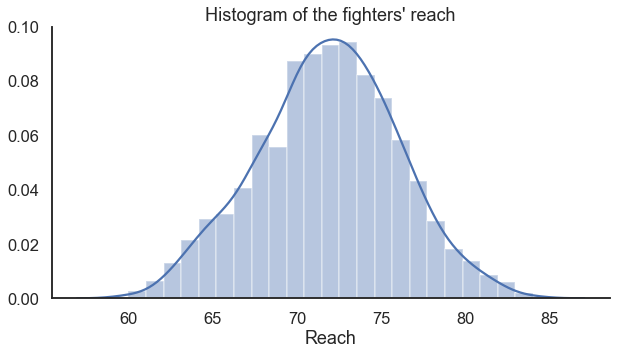

In [129]:
column_distplot(data_fighters, 'reach')

- As this reach distribution is approximately normally distributed with no extreme outliers, we will fill the na values with the mean value of reach

In [130]:
data_fighters.reach = data_fighters.reach.fillna(round(data_fighters.reach.mean(), 0))

#### Stance column

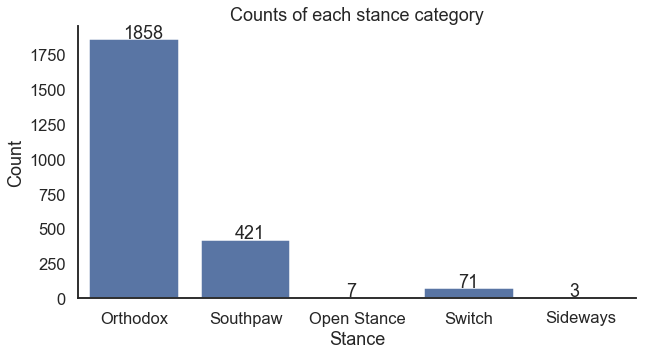

In [131]:
column_countplot(data_fighters, 'stance', show_count=True)

- The vast majority of fighters fight in the orthodox stance, so it is easiest to fill the na values with this modal average

In [132]:
stance_mode_avg = data_fighters.stance.mode()[0]
data_fighters.stance.fillna(stance_mode_avg, inplace=True)

#### dob column

In [133]:
# Create the year of birth column (dob_year)
data_fighters['dob_year'] = 0
for index, value in enumerate(data_fighters['dob']):
    data_fighters['dob_year'][index] = data_fighters['dob'][index].year
    
today = datetime.date.today()

# Fighter's age_today = difference in today's year and their year of birth
data_fighters['age_today'] = today.year - data_fighters.dob_year

/anaconda3/envs/ml-ufc-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/envs/ml-ufc-env/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


/anaconda3/envs/ml-ufc-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Age_today Skewness: 0.65
Age_today Kurtosis: 0.76
Age_today Mean: 36.56
Age_today Median: 36.0


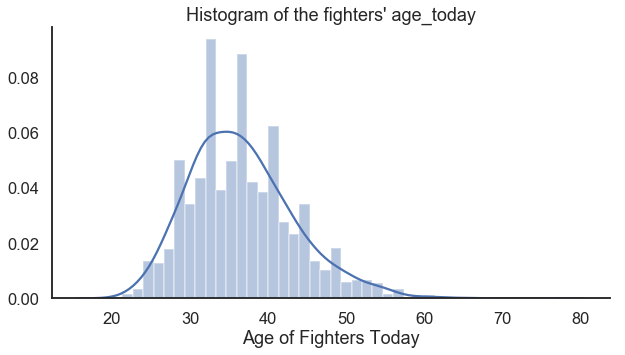

In [134]:
column_distplot(data_fighters, 'age_today', xlabel='Age of Fighters Today')

- The distribution of fighter ages is fairly normal, but due to the skewness and kurtosis we will choose to use the median age to fill in the NaN values.

In [135]:
# Calculate the median date of birth
dates = list(data_fighters.sort_values('dob')['dob'])
median_dob = dates[len(dates)//2]
print('The median date of birth is {}-{}-{}'.format(median_dob.year, median_dob.month, median_dob.day))

# Fill na values with this median date of birth
data_fighters.dob.fillna(median_dob, inplace=True)

The median date of birth is 1986-3-12


#### height column

In [136]:
# Drop ' and " signs
data_fighters['height'] = data_fighters['height'].str.replace("'","")
data_fighters['height'] = data_fighters['height'].str.replace('"',"")

In [137]:
# Calculate height in inches based off the feet and inches in height column
# Note that we can only perform the operation on columns that are not NaN
height_not_na = ~data_fighters['height'].isna()
data_fighters['height_inches'] = data_fighters['height'][height_not_na].apply(lambda x: parse_height(x))

Height_inches Skewness: 0.08
Height_inches Kurtosis: 0.32
Height_inches Mean: 70.39
Height_inches Median: 70.0


/anaconda3/envs/ml-ufc-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


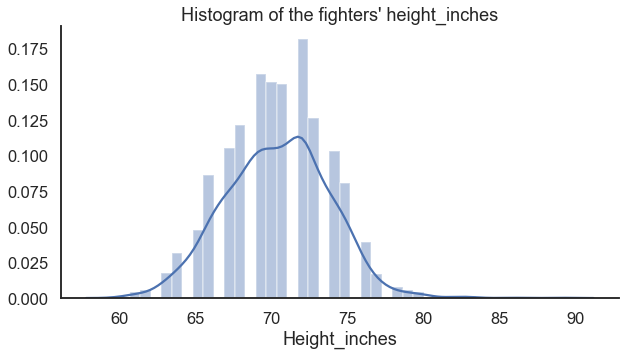

In [138]:
column_distplot(data_fighters, 'height_inches')

- We will use the mean height to fill in NaN values for height

In [139]:
height_inches_not_na = data_fighters['height_inches'][~data_fighters['height_inches'].isna()]
height_mean = height_inches_not_na.mean()
print('The mean height of a fighter is {} inches'.format(round(height_mean, 1)))

# Fill na values with this mean height
data_fighters.height_inches.fillna(height_mean, inplace=True)

The mean height of a fighter is 70.4 inches


#### Remove fighters with limited statistics

In [140]:
# Original number of fighters
total_fighters = len(data_fighters)
print('We have {} fighters in our original data.'.format(total_fighters))

# Fighters with no recorded stats
fight_statistics = ['SLpM', 'Str_Acc', 'SApM']
no_stat_fighters = len(data_fighters[(data_fighters[fight_statistics]==0).any(axis=1)])
print('There are {} fighters that have no statistics for the columns: {}.'.format(no_stat_fighters, fight_statistics))

# Reduced dataset size
data_fighters = data_fighters[~(data_fighters[fight_statistics]==0).any(axis=1)]
stat_fighters = len(data_fighters)
print('We therefore reduce the number of fighters in our data to {}.'.format(stat_fighters))

# Reset the index
data_fighters.reset_index(drop=True, inplace=True)

We have 3187 fighters in our original data.
There are 727 fighters that have no statistics for the columns: ['SLpM', 'Str_Acc', 'SApM'].
We therefore reduce the number of fighters in our data to 2460.


#### Check for Duplicate Names

In [141]:
if len(data_fighters) == data_fighters.fighter_id.nunique():
    print('The fighter_id column has only unique values')

The fighter_id column has only unique values


In [142]:
# calculate how many duplicated fighter names there are
non_unique_names = data_fighters.shape[0] - data_fighters.name.nunique()
print('The {} name(s) in the dataframe that is/are not unique are:'.format(non_unique_names))

# print out duplicated figher names
duplicate_names = list(data_fighters['name'][data_fighters.duplicated(subset="name")])
for i, name in zip(range(1,len(duplicate_names)+1), duplicate_names):
    print('\t{})'.format(i), name)

The 1 name(s) in the dataframe that is/are not unique are:
	1) Dong Hyun Kim


In [143]:
data_fighters[data_fighters.duplicated(subset="name", keep=False)]

,fighter_id,name,win,lose,draw,nc,height,weight,reach,stance,...,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg,last_updated,dob_year,age_today,height_inches
657,845,Dong Hyun Kim,16,8,3,0,5 11,155 lbs.,70.0,Orthodox,...,4.53,53,1.67,60,33,0.0,2018-11-21 20:26:57.805101,1988.0,31.0,71.0
663,852,Dong Hyun Kim,22,4,1,1,6 2,170 lbs.,76.0,Southpaw,...,1.89,58,2.93,43,71,0.6,2018-11-21 20:27:20.82459,1981.0,38.0,74.0


- It appears that each fighter is unique in the table above, as statistics such as date of birth (dob) and weight differ.  
- Upon further investigation, these are indeed two different fighters, with the 1st fighter (born 1988) changing his ring name to Dong Hyun Ma to avoid the confusion with Dont Hyun Kim (born 1981)
- We shall change the name of the 1st fighter Dong Hyun Kim (born 1988) to Dong Hyun Ma

In [144]:
# Check if there are any Dong Hyun Ma in the dataset
if len(data_fighters[data_fighters.name=='Dong Hyun Ma']):
    print('Dong Hyun Ma already exists')
else:
    # Find the right Dong Hyun Kim, who is now Dong Hyun Ma
    DongHyunMa = data_fighters['name']=='Dong Hyun Kim'
    DongHyunMa_dob = data_fighters['dob']=='1988-09-09'
    # Change name to Dong Hyun Ma
    data_fighters['name'][DongHyunMa & (DongHyunMa_dob)] = 'Dong Hyun Ma'
    print('Dong Hyun Kim 1988 has been renamed as Dong Hyun Ma')

Dong Hyun Kim 1988 has been renamed as Dong Hyun Ma


#### Drop Unecessary Columns

We now need to drop variables that have no likely impact on the outcome of a fight. 
- Weight: Although in reality a fighter's weight is extremely important, within a single fight, both fighter's weights will be within a narrow window and very similar to each other, i.e. any difference will be negligible

In [145]:
# Columns to drop
cols_to_drop = ['fighter_id',  'nc', 'height', 'weight', 'last_updated', 'dob_year']

# Drop the columns
data_fighters.drop(cols_to_drop, axis=1, inplace=True)

# View the narrower fighters dataframe
data_fighters.head(3)

,name,win,lose,draw,reach,stance,dob,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg,age_today,height_inches
0,Luciano Azevedo,16,9,1,72.0,Orthodox,1981-06-25,0.76,45,1.97,27,2.28,11,0,0.0,38.0,75.0
1,Gleidson Cutis,7,3,0,72.0,Orthodox,1989-02-07,2.99,52,8.28,59,0.00,0,0,0.0,30.0,69.0
2,Rolando Dy,9,7,1,69.0,Orthodox,1990-08-11,3.04,37,4.47,52,0.30,20,68,0.0,29.0,68.0


#### Add total_bouts column

In [146]:
# don't include nc values, as they do not useful in predicting a winner
data_fighters['total_bouts'] = data_fighters['win'] + data_fighters['lose'] + data_fighters['draw']

#### Add win rate column

In [147]:
data_fighters['win_rate'] = round(data_fighters['win'] / data_fighters['total_bouts'], 2)

#### Rearrange columns and group similar columns together

In [148]:
fighter_columns = data_fighters.columns
fighter_columns

Index(['name', 'win', 'lose', 'draw', 'reach', 'stance', 'dob', 'SLpM',
       'Str_Acc', 'SApM', 'Str_Def', 'TD_Avg', 'TD_Acc', 'TD_Def', 'Sub_Avg',
       'age_today', 'height_inches', 'total_bouts', 'win_rate'],
      dtype='object')

In [149]:
data_fighters = data_fighters[['name', 'win', 'lose', 'draw', 'total_bouts', 'win_rate', 
                               'height_inches', 'reach', 'stance', 'dob', 'age_today', 
                               'SLpM', 'Str_Acc', 'SApM', 'Str_Def', 'TD_Avg', 'TD_Acc', 'TD_Def', 'Sub_Avg']]

#### Change all column headings to lower

In [150]:
data_fighters.columns = data_fighters.columns.str.lower()

### Fighters Data - Further Exploration

In [151]:
np.round(data_fighters.describe(), 2)

,win,lose,draw,total_bouts,win_rate,height_inches,reach,age_today,slpm,sapm,td_avg,sub_avg
count,2460.00,2460.00,2460.00,2460.00,2460.00,2460.00,2460.00,2185.00,2460.00,2460.00,2460.00,2460.00
mean,13.12,5.51,0.31,18.94,0.69,70.32,71.90,36.10,2.78,3.45,1.48,0.77
std,8.36,4.52,0.87,12.01,0.16,3.38,3.19,6.35,1.86,2.36,1.84,1.45
min,0.00,0.00,0.00,1.00,0.00,60.00,60.00,20.00,0.06,0.13,0.00,0.00
25%,7.00,3.00,0.00,11.00,0.62,68.00,71.00,31.00,1.58,2.16,0.00,0.00
50%,12.00,4.00,0.00,16.00,0.71,70.00,72.00,36.00,2.54,3.00,1.00,0.20
75%,17.00,7.00,0.00,24.00,0.79,73.00,73.00,40.00,3.56,4.09,2.21,1.00
max,88.00,74.00,11.00,121.00,1.00,89.00,84.00,58.00,30.00,49.41,24.11,20.90


In [152]:
data_fighters[data_fighters.lose>30]

,name,win,lose,draw,total_bouts,win_rate,height_inches,reach,stance,dob,age_today,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg
339,Ikuhisa Minowa,51,32,8,91,0.56,69.0,72.0,Orthodox,1976-01-12,43.0,0.88,40,1.66,49,1.82,41,5,1.9
1871,Vernon White,26,33,2,61,0.43,72.0,72.0,Southpaw,1971-12-03,48.0,2.11,38,2.20,54,0.88,28,44,0.0
2408,Shannon Ritch,47,74,0,121,0.39,69.0,72.0,Orthodox,1970-09-27,49.0,1.00,100,6.00,50,0.00,0,0,0.0


#### set name column into index

In [153]:
data_fighters.set_index('name', inplace=True)

#### Save the cleaned fighters df to processed data file

In [154]:
data_fighters.to_csv('../data/processed/fighters_cleaned')

## Combine Dataframes
- Here we combine the bouts data with the fighters data, into 1 dataframe that will be used for the machine learning process
- We can only look at bouts where we have information on both fighters

In [155]:
bouts_cleaned = pd.read_csv('../data/processed/bouts_cleaned', index_col=0)
fighters_cleaned = pd.read_csv('../data/processed/fighters_cleaned', index_col=0)

In [156]:
bouts_cleaned.drop(columns='index', inplace=True)

In [157]:
original_bout_length = len(bouts_cleaned)

# Create a list of all the fighters' names
name_list = fighters_cleaned.index.tolist()

# Create booleans for whether the name in fighter1/figther2 column appears in our list of fighter names
f1_in_name_list = bouts_cleaned['fighter1'].isin(name_list)
f2_in_name_list = bouts_cleaned['fighter2'].isin(name_list)

# Drop out the rows where at least 1 of names does not appear in our fighter names list
bouts_cleaned = bouts_cleaned[(f1_in_name_list) & (f2_in_name_list)]

# Print the action we have carried out
new_bout_length = len(bouts_cleaned)
print('We have reduced the number of bouts from {} to {}, as we do not have statistics for {} fighters'
      .format(original_bout_length, new_bout_length, original_bout_length-new_bout_length))

We have reduced the number of bouts from 4796 to 4570, as we do not have statistics for 226 fighters


### Create 2 new dataframes for fighter1 data and fighter2 data

In [158]:
# Pull in the statistics for each fighter1
data_fighter1 = fighters_cleaned.loc[bouts_cleaned["fighter1"]]
# Pull in the statistics for each fighter2
data_fighter2 = fighters_cleaned.loc[bouts_cleaned["fighter2"]]

# Add suffix to each new dataframe's columns so we can merge them
data_fighter1 = data_fighter1.add_prefix('fighter1_')
data_fighter2 = data_fighter2.add_prefix('fighter2_')

# Reset the indices so we can merge them
data_fighter1.reset_index(inplace=True)
data_fighter2.reset_index(inplace=True)

### Create a combined dataframe of bouts with details of fighter1 and fighter2

In [159]:
# Create a merged dataframe
data_combined = pd.concat([bouts_cleaned, data_fighter1, data_fighter2], axis=1)
data_combined.head(3)

,date,location,fighter1,fighter2,winner_is_fighter1,title_fight,method_DEC,method_DQ,method_KO/TKO,method_SUB,...,fighter2_dob,fighter2_age_today,fighter2_slpm,fighter2_str_acc,fighter2_sapm,fighter2_str_def,fighter2_td_avg,fighter2_td_acc,fighter2_td_def,fighter2_sub_avg
0,2018-11-17,Argentina,Santiago Ponzinibbio,Neil Magny,1.0,0.0,0.0,0.0,1.0,0.0,...,1987-08-03,32.0,3.86,46.0,2.22,56.0,2.62,46.0,60.0,0.3
1,2018-11-17,Argentina,Ricardo Lamas,Darren Elkins,1.0,0.0,0.0,0.0,1.0,0.0,...,1984-05-16,35.0,3.36,37.0,2.83,53.0,2.68,35.0,57.0,1.3
2,2018-11-17,Argentina,Khalil Rountree Jr.,Johnny Walker,0.0,0.0,0.0,0.0,1.0,0.0,...,1992-03-30,27.0,5.37,70.0,3.36,25.0,0.89,100.0,100.0,2.6


In [160]:
# Drop the name columns (2 of them)
data_combined.drop(columns='name', inplace=True)

### Save combined dataframe to csv

In [161]:
data_combined.to_csv('../data/processed/combined', index=False)

# STILL TO DO

- change age_today to age_at_fight
- grab home country of each fighter

In [162]:
# data_combined.date[0].year - data_combined.fighter2_dob[0].year

In [163]:
# data_combined['fighter1_age_at_fight'] = 0
# data_combined['fighter2_age_at_fight'] = 0
# for row in list(range(len(data_combined))):
#     data_combined['fighter1_age_at_fight'] = data_combined.date[row].year - data_combined.fighter1_dob[row].year
#     data_combined['fighter2_age_at_fight'] = data_combined.date[row].year - data_combined.fighter2_dob[row].year

In [164]:
# data_combined[['date', 'fighter1_dob', 'fighter2_dob']].describe()

## 227 rows with Nan values

In [165]:
temp_df = pd.read_csv('../data/processed/combined')
temp_df.tail()

,date,location,fighter1,fighter2,winner_is_fighter1,title_fight,method_DEC,method_DQ,method_KO/TKO,method_SUB,...,fighter2_dob,fighter2_age_today,fighter2_slpm,fighter2_str_acc,fighter2_sapm,fighter2_str_def,fighter2_td_avg,fighter2_td_acc,fighter2_td_def,fighter2_sub_avg
4791,2018-11-10,USA,Bobby Moffett,Chas Skelly,1.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4792,2018-11-10,USA,Davi Ramos,John Gunther,1.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4793,2018-11-10,USA,Devonte Smith,Julian Erosa,1.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4794,2018-11-10,USA,Eric Shelton,Joseph Morales,1.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4795,2018-11-10,USA,Mark De La Rosa,Joby Sanchez,1.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
temp_df = pd.read_csv('../data/raw/ufc_fighters.csv')

In [167]:
temp_df[(temp_df.name=='Eric Shelton') | (temp_df.name=='Joseph Morales')]

,fighter_id,name,win,lose,draw,nc,height,weight,reach,stance,dob,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg,last_updated
373,374,Joseph Morales,9,2,0,0,"5' 6""",125 lbs.,"69""",Switch,"Aug 22, 1994",1.58,37%,1.72,60%,0.53,50%,23%,2.6,2018-11-21 19:58:02.045657
2889,2890,Eric Shelton,12,5,0,0,"5' 6""",125 lbs.,"68""",Orthodox,"Feb 02, 1991",2.75,44%,1.63,65%,3.40,51%,43%,0.2,2018-11-21 22:32:50.582607


## 226 winner is fighter1  missing.  could be draws?

In [168]:
temp_df = pd.read_csv('../data/processed/combined')

In [169]:
temp_df[temp_df.winner_is_fighter1.isna()]

,date,location,fighter1,fighter2,winner_is_fighter1,title_fight,method_DEC,method_DQ,method_KO/TKO,method_SUB,...,fighter2_dob,fighter2_age_today,fighter2_slpm,fighter2_str_acc,fighter2_sapm,fighter2_str_def,fighter2_td_avg,fighter2_td_acc,fighter2_td_def,fighter2_sub_avg
206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1964-02-11,55.0,1.47,46.0,4.30,39.0,0.94,60.0,44.0,2.5
207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1966-12-12,53.0,0.88,41.0,1.13,37.0,0.00,0.0,66.0,0.8
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1968-01-05,51.0,0.76,83.0,2.12,30.0,4.55,100.0,0.0,2.3
210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1965-11-23,54.0,2.87,64.0,3.57,37.0,0.91,57.0,45.0,0.7
211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1964-12-20,55.0,1.88,52.0,2.62,40.0,3.89,40.0,50.0,0.8
212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1965-11-23,54.0,2.87,64.0,3.57,37.0,0.91,57.0,45.0,0.7
213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1966-01-17,53.0,1.84,56.0,2.14,48.0,0.40,100.0,53.0,0.8
214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1965-02-07,54.0,1.83,35.0,3.02,56.0,0.87,100.0,80.0,0.0
215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1968-02-23,51.0,0.92,31.0,0.83,44.0,1.85,28.0,0.0,0.5
216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1977-04-01,42.0,1.59,46.0,2.83,50.0,1.02,60.0,53.0,0.6


### Feature Engineer columns for home advantage (need fighter hometown data)

In [170]:
# # binary columns: 1 if the fighter is fighting in his home country.
# data_combined['fighter1_home_adv'] = data_combined['location' == 'fighter1_home']
# data_combined['fighter2_home_adv'] = data_combined['location' == 'fighter2_home']

### Get Dummies for stance

Need to also add it back into the X_train on model